# Room for the river: Gorssel 

In [1]:
#imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (Model, CategoricalParameter,ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, ema_logging, Constant, Policy, Scenario,
                           perform_experiments, SequentialEvaluator,Constraint)
from problem_formulation import get_model_for_problem_formulation

from dike_model_function import DikeNetwork  # @UnresolvedImport

from ema_workbench.em_framework.optimization import (HyperVolume, EpsilonProgress,GenerationalBorg)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from ema_workbench.analysis import plotting, plotting_util, parcoords, feature_scoring, prim

from mpl_toolkits.mplot3d import Axes3D 

import time
import copy

## Explore effects of scenario's 

### Run Model 

In [2]:
#running the model through EMA workbench
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3) 


In [3]:
# with SequentialEvaluator(dike_model) as evaluator:
#     results_s100_p5 = evaluator.perform_experiments(scenarios=100, policies=5) 
#     #s for number of scenarios, p for number of experiments 
# experiments_s100_p5, outcomes_s100_p5 = results_s100_p5 
# #s for number of scenarios, p for number of experiments 

[MainProcess/INFO] performing 100 scenarios * 5 policies * 1 model(s) = 500 experiments
100%|████████████████████████████████████████| 500/500 [10:47<00:00,  1.30s/it]
[MainProcess/INFO] experiments finished


In [3]:
# with SequentialEvaluator(dike_model) as evaluator:
#     results_s1000_p10 = evaluator.perform_experiments(scenarios=1000, policies=10) 
#     #s for number of scenarios, p for number of experiments 



[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
100%|██████████████████████████████████| 10000/10000 [8:50:43<00:00,  3.18s/it]
[MainProcess/INFO] experiments finished


In [4]:
# experiments_s1000_p10, outcomes_s1000_p10 = results_s1000_p10 
# #s for number of scenarios, p for number of experiments 



In [5]:
# #save the initial results to be sure the original can be reused without having to run the model again 
# raw_outcomes_s1000_p10    = outcomes_s1000_p10.copy()
# raw_experiments_s1000_p10 = experiments_s1000_p10.copy()

# df_experiments_s1000_p10 = pd.DataFrame(experiments_s1000_p10)

# df_outcomes_s1000_p10 =pd.DataFrame()
# for outcome in outcomes_s1000_p10.keys():
#     df_outcomes_s1000_p10[outcome] = outcomes_s1000_p10[outcome]

# #df_experiments_s100_p5
# #df_experiments_s100_p5.columns

# #df_experiments_s1000_p10.to_csv("df_experiments_s1000_p10.csv") #save the dataframes
# #df_outcomes_s1000_p10.to_csv("df_outcomes_s1000_p10.csv")

In [3]:
# #save the initial results to be sure the original can be reused without having to run the model again 
# raw_outcomes_s100_p5    = outcomes_s100_p5.copy()
# raw_experiments_s100_p5 = experiments_s100_p5.copy()

In [36]:
# df_experiments_s100_p5 = pd.DataFrame(experiments_s100_p5)

# df_outcomes_s100_p5 =pd.DataFrame()
# for outcome in outcomes_s100_p5.keys():
#     df_outcomes_s100_p5[outcome] = outcomes_s100_p5[outcome]

# df_experiments_s100_p5
# df_experiments_s100_p5.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model', 'A.4 Total Costs',
       'A.4_Expected Number of Deaths', 'RfR Total Costs',
       'Exp

In [ ]:
# df_experiments_s100_p5.to_csv("df_experiments_s100_p5.csv") #save the dataframes
# df_outcomes_s100_p5.to_csv("df_outcomes_s100_p5.csv")

### Load results instead of running code 

In [9]:
df_experiments_s1000_p10 = pd.read_csv("df_experiments_s100_p5.csv")
df_outcomes_s1000_p10 = pd.read_csv("df_outcomes_s100_p5.csv")


In [10]:
df_experiments_s1000_p10

,Unnamed: 0,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,...,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,A.4 Total Costs,A.4_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,0,49,197.760084,1.5,0.448757,63.618562,1.0,0.690241,183.872065,1.0,...,7,7,0,5,0,dikesnet,5.210699e+07,0.000000,1.382500e+09,0.000000
1,1,131,81.697205,1.0,0.564835,100.898622,1.5,0.990856,164.525068,10.0,...,7,7,0,6,0,dikesnet,5.210699e+07,0.000000,1.382500e+09,0.000000
2,2,87,286.911410,10.0,0.833263,201.209686,1.5,0.312417,268.712551,1.0,...,7,7,0,7,0,dikesnet,5.210699e+07,0.000000,1.382500e+09,0.000000
3,3,83,49.155482,1.5,0.895915,83.394296,10.0,0.058932,86.080839,1.0,...,7,7,0,8,0,dikesnet,5.210699e+07,0.000000,1.382500e+09,0.000000
4,4,105,184.567709,1.5,0.246913,131.188151,10.0,0.260352,212.991679,10.0,...,7,7,0,9,0,dikesnet,5.210699e+07,0.000000,1.382500e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,127,95.161703,10.0,0.468567,209.058078,1.0,0.849056,303.439289,10.0,...,1,9,1,100,4,dikesnet,5.004945e+07,0.000000,1.293500e+09,34.136774
496,496,69,128.247535,10.0,0.734744,127.357687,1.5,0.703131,89.875049,10.0,...,1,9,1,101,4,dikesnet,5.004945e+07,0.000000,1.293500e+09,493.348184
497,497,51,113.239270,1.0,0.352723,50.307273,10.0,0.502460,231.988778,10.0,...,1,9,1,102,4,dikesnet,5.004945e+07,0.000000,1.293500e+09,0.000000
498,498,54,271.377684,10.0,0.932612,186.187565,10.0,0.906802,216.459380,1.5,...,1,9,1,103,4,dikesnet,5.102073e+07,0.000242,1.293500e+09,52.340290


# Make images 

In [11]:
experiments = df_experiments_s1000_p10.copy()
outcomes = df_outcomes_s1000_p10.copy()

In [12]:
#outcomes[['A.4_Expected Annual Damage','A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths','RfR Total Costs','Expected Evacuation Costs']]
#outcomes.keys()
experiments.keys()
#experiments[['A.4_Bmax', 'A.4_Brate', 'A.4_pfail','A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2','scenario', 'policy', 'model']]



Index(['Unnamed: 0', 'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate',
       'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax',
       'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail',
       'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0',
       'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2',
       '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2',
       '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model', 'A.4 Total Costs',
       'A.4_Expected Number of Deaths', 'RfR Total Costs

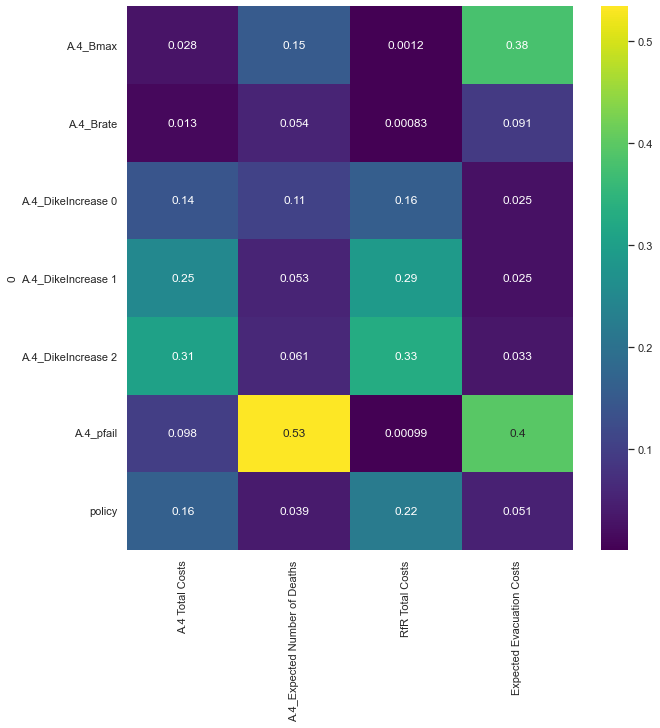

<Figure size 720x720 with 0 Axes>

In [17]:
fs = feature_scoring.get_feature_scores_all(experiments[['A.4_Bmax', 'A.4_Brate', 'A.4_pfail','A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 
             'A.4_DikeIncrease 2','scenario', 'policy', 'model']], outcomes[['A.4 Total Costs', #'A.4_Expected Annual Damage','A.4_Dike Investment Costs', 
         'A.4_Expected Number of Deaths','RfR Total Costs','Expected Evacuation Costs']])

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()
plt.savefig('FeatureScore_s1000_p10')

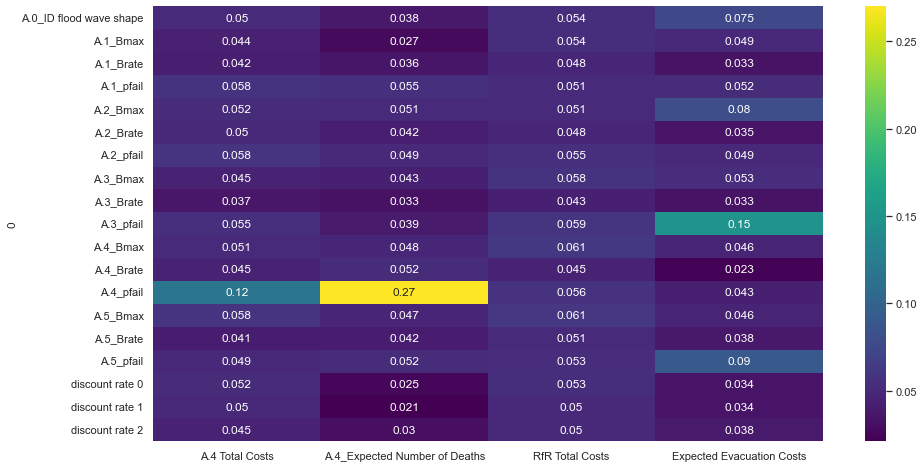

In [10]:

# x = experiments_s100_p5[['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
#        'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
#        'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
#        'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
#        'discount rate 2']].copy()
# y = outcomes_s100_p5.copy()

# fs = feature_scoring.get_feature_scores_all(x, outcomes_s100_p5)

# sns.set(rc = {'figure.figsize':(15,8)})
# sns.heatmap(fs, cmap="viridis", annot=True)
# plt.show()

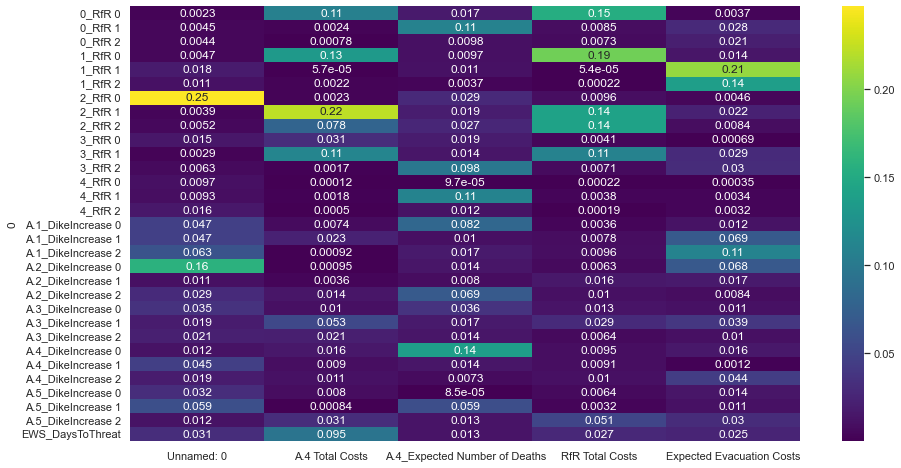

In [20]:
x = df_experiments_s1000_p10[['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat']].copy()

fs = feature_scoring.get_feature_scores_all(x, df_outcomes_s1000_p10)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

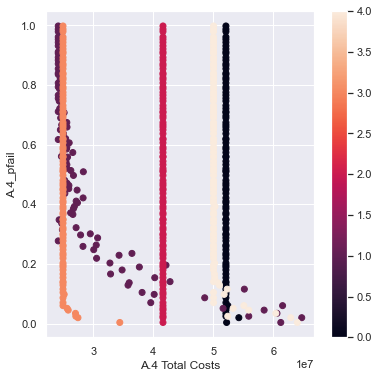

In [22]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(df_outcomes_s1000_p10['A.4 Total Costs'], df_experiments_s1000_p10['A.4_pfail'], 
                c=df_experiments_s1000_p10['policy'])
plt.colorbar(sc)

ax.set_xlabel('A.4 Total Costs')
ax.set_ylabel('A.4_pfail')
plt.show()

In [13]:
## Looking at a single policy and what this policy entails 

# experiments_s100_p5[experiments_s100_p5['policy'] == 4][['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
#        '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
#        '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
#        'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
#        'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
#        'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
#        'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
#        'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
#        'EWS_DaysToThreat']].iloc[0]

In [14]:
## Looking at a single policy and what this policy entails 

# experiments_s100_p5[experiments_s100_p5['policy'] == 1][['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
#        '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
#        '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
#        'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
#        'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
#        'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
#        'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
#        'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
#        'EWS_DaysToThreat']].iloc[0]

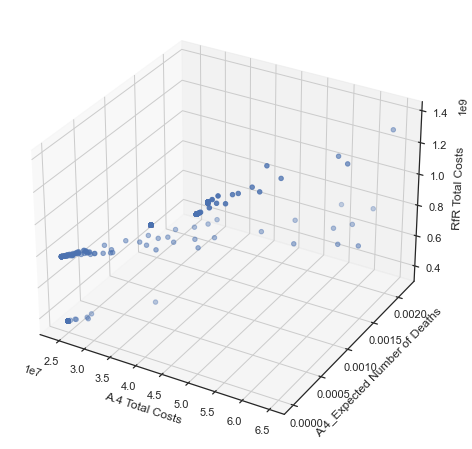

In [31]:
# visualization of our results in a 3d scatter plot. Choose the outcomes you are intersted in 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(outcomes_s100_p5['A.4 Total Costs'], outcomes_s100_p5['A.4_Expected Number of Deaths'], outcomes_s100_p5['RfR Total Costs'])#,outcomes_s100_p5['Expected Evacuation Costs'])
ax.set_xlabel('A.4 Total Costs')
ax.set_ylabel('A.4_Expected Number of Deaths')
ax.set_zlabel('RfR Total Costs')
plt.show()

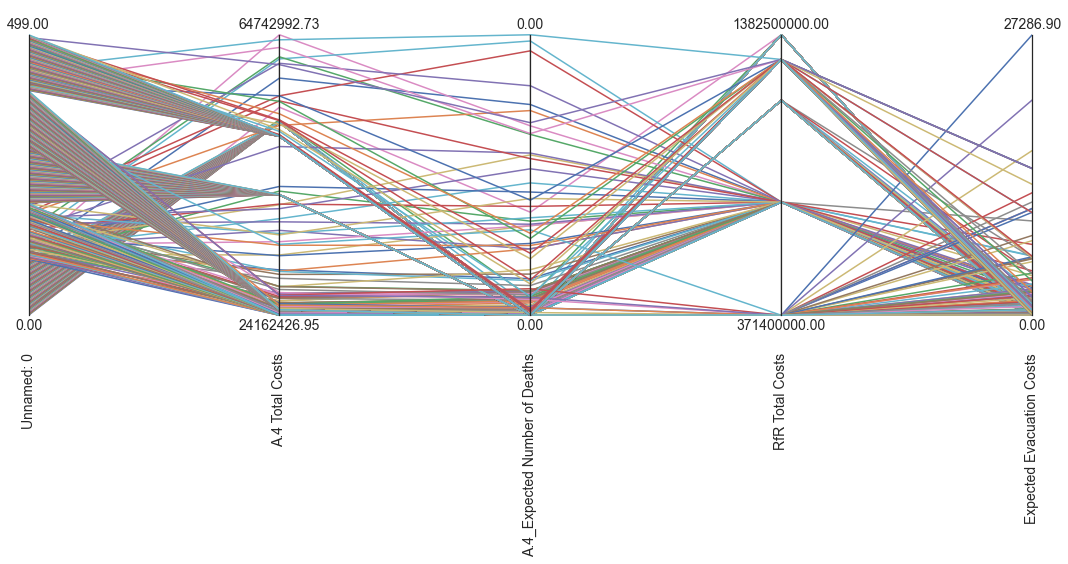

In [23]:
#parallel coordinate plot. In a parallel coordinate plot, the dimensions are visualized side by side.
#Each line represents a scenario that is pareto optimal 

outcomes = pd.DataFrame.from_dict(outcomes)#results_s100_p5.loc[:, ['A.4 Total Costs', 'A.4_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']]
limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

# we can invert an axis if necessary, so the direction of desirability is the same 
#axes.invert_axis('max_P') 
plt.show()



### Hypervolume 

I'm not sure this is coded correctly -Anne-Kee 

In [43]:
# # because of the constraint on pollution, we can specify the 
# # maximum easily
# convergence_metrics = [HyperVolume(minimum=[0,0,0,0], maximum=[1,1,1,1]),
#                        EpsilonProgress()]
# constraints = [Constraint("max pollution", outcome_names="max_P",
#                           function=lambda x:max(0, x-1))]
 
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results_ref1, convergence1 = evaluator.optimize(nfe=25000, searchover='levers', 
#                                     epsilons=[0.05,]*len(dike_model.outcomes),
#                                     convergence=convergence_metrics,
#                                     constraints=constraints,
#                                     population_size=100)


[MainProcess/INFO] pool started with 8 workers
  0%|                                                | 0/25000 [00:00<?, ?it/s]Process SpawnPoolWorker-20:
Process SpawnPoolWorker-21:
Process SpawnPoolWorker-15:
Process SpawnPoolWorker-18:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/opt/anaconda3/lib/python3.9/site-packages/ema_workbench/em_framework/ema_multiprocessing.py", line 168, in worker
    return experiment, experiment_runner.run_experiment(experiment)
  File "/opt/anaconda3/lib/python3.9/site-packages/ema_workbench/util/ema_logging.py", line 152, in wrapper
    res = func(*args, **kwargs)
  F

KeyboardInterrupt: 

In [46]:
#week 5-6, assignement 7 & https://waterprogramming.wordpress.com/category/software/emaworkbench/ 

convergence_metrics = [HyperVolume(minimum=[0,0,0,0], maximum=[400,,1,1])] #these max & min are from an example (https://waterprogramming.wordpress.com/category/software/emaworkbench/) so is not correct I think 

constraints = [Constraint("A.4 Total Costs", outcome_names="A.4_Expected Number of Deaths", 
                          function=lambda x:max(0, x-5))]

In [45]:
dike_model.outcomes

In [48]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results_ref1, convergence1 = evaluator.optimize(nfe=250, searchover='levers', 
                                    epsilons=[0.05,]*len(dike_model.outcomes),
                                    convergence=convergence_metrics,
                                    constraints=constraints,
                                    population_size=100)



  0%|                                                  | 0/250 [00:00<?, ?it/s]

 40%|████████████████                        | 100/250 [00:43<01:05,  2.30it/s]

 80%|████████████████████████████████        | 200/250 [01:27<00:21,  2.29it/s]

300it [02:14,  2.23it/s]                                                       
[MainProcess/INFO] optimization completed, found 12 solutions


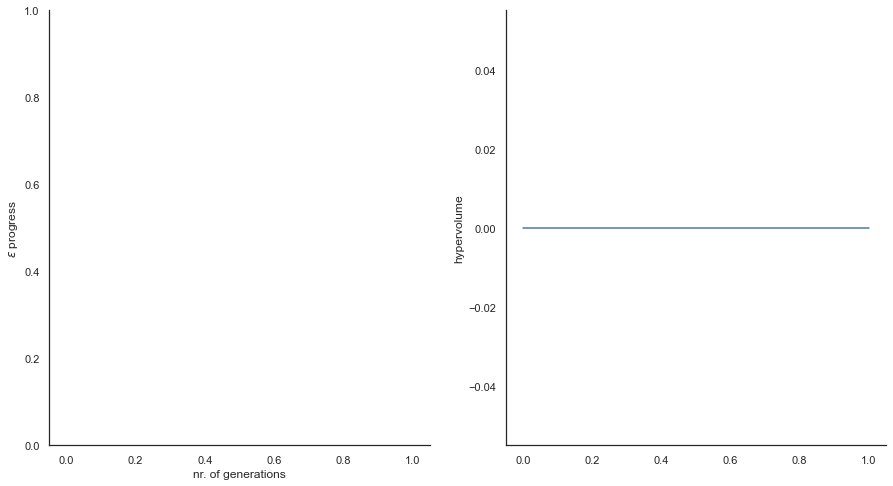

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)
#ax1.plot(convergence1.epsilon_progress)
ax1.set_xlabel('nr. of generations')
ax1.set_ylabel('$\epsilon$ progress')
ax2.plot(convergence1.hypervolume)
ax2.set_ylabel('hypervolume')
sns.despine()
plt.show()


## Explore effects of Levers

In [15]:
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

with SequentialEvaluator(dike_model) as evaluator:
    results_s1_p500 = evaluator.perform_experiments(scenarios=1, policies=500)

[MainProcess/INFO] performing 1 scenarios * 500 policies * 1 model(s) = 500 experiments
  1%|▎                                         | 4/500 [00:05<11:00,  1.33s/it]

KeyboardInterrupt: 

In [ ]:
experiments_s1_p500, outcomes_s1_p500 = results_s1_p500
x = experiments_s1_p500[['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat']].copy()

fs = feature_scoring.get_feature_scores_all(x, outcomes_s1_p500)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [ ]:
y_transformed = pd.DataFrame()
for keys in y.keys():
    y_transformed[keys] = outcomes_s1_p500[keys] 

In [ ]:
y_transformed['RfR Total Costs'].quantile()

In [ ]:
y_transformed['of_interest'] = y_transformed['RfR Total Costs'] < 1051100000.0

In [ ]:
y_transformed['of_interest']

In [ ]:
x = experiments_s1_p500[['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2']].copy()

In [ ]:
prim_alg = prim.Prim(x, y_transformed['of_interest'], threshold=0.3, peel_alpha=0.1)
box1 = prim_alg.find_box()


In [ ]:
n=2
box1.show_tradeoff()
#print(box1.resample(n))
box1.inspect(n)
box1.inspect(n, style="graph")
box1.show_pairs_scatter(n)

plt.show()

## Choose Policies

In [ ]:
policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

# MORDM 